Maps:

In this section we will explore how to plot on maps.

In this exercise we will:

1. Write a script in python return the google maps url when passed with the latitude and longitudinal values of the place
2. Create a map where the density of points is represented as a density map (topographical map)
3. Create a map that would represent, using color, the values of a chosen column (Mean, Std, V0,V1 etc.). Draw conclusions from the map


In [1]:
# Write a script in python return the google maps url when passed with the latitude and longitudinal values of the place

import webbrowser

# The function below takes latitude and longitude as inputs and opens that point on google maps in a new tab
def open_gmap(lat,lon):
    url = "http://maps.google.com/?q=%s,%s" % (lat,lon)
    webbrowser.open(url)

## Input a valid latitude and longitude value below to open the google maps url    
open_gmap(12.9667,77.5667)

In [4]:
%cd /Users/Deepthi/Documents/DSE/dmysoren/DSE200/data/weather

/Users/Deepthi/Documents/DSE/dmysoren/DSE200/data/weather


In [5]:
## Get data

out=open('ghcnd-stations_buffered.txt','w')
for line in open('ghcnd-stations.txt','r').readlines():
    line=line.rstrip()
    string=line+' '*(90-len(line))+'\n'
    out.write(string)
out.close()

In [6]:
## Create stations dataframe from the data

import pandas as pd
colspecs = [(0, 11), (11, 21), (21, 31), (31, 38),(39,41),(41,72),(72,76),(76,80),(80,86)]
stations = pd.read_fwf('ghcnd-stations_buffered.txt', colspecs=colspecs, header=None, index_col=0,
                       names=['latitude','longitude','elevation','state','name','GSNFLAG','HCNFLAG','WMOID'])

In [7]:
stations.head()

,latitude,longitude,elevation,state,name,GSNFLAG,HCNFLAG,WMOID
ACW00011604,17.1167,-61.7833,10.1,NaN,ST JOHNS COOLIDGE FLD,NaN,NaN,NaN
ACW00011647,17.1333,-61.7833,19.2,NaN,ST JOHNS,NaN,NaN,NaN
AE000041196,25.3330,55.5170,34.0,NaN,SHARJAH INTER. AIRP,GSN,NaN,41196
AF000040930,35.3170,69.0170,3366.0,NaN,NORTH-SALANG,GSN,NaN,40930
AG000060390,36.7167,3.2500,24.0,NaN,ALGER-DAR EL BEIDA,GSN,NaN,60390


In [8]:
## Create required parameters to plot the map

lons=stations.ix[:,'longitude'].values
lats=stations.ix[:,'latitude'].values
elev=stations.ix[:,'elevation'].values
station_names=stations.index.values
ll=len(lons)
lonmin=-180;lonmax=180;latsmin=-80;latsmax=80;
select=(lons>lonmin) * (lons<lonmax)*(lats>latsmin)*(lats<latsmax)
print sum(select)
station_names=station_names[select]
lons=lons[select]
lats=lats[select]
print len(lons),len(lats),len(station_names)

85273
85273 85273 85273


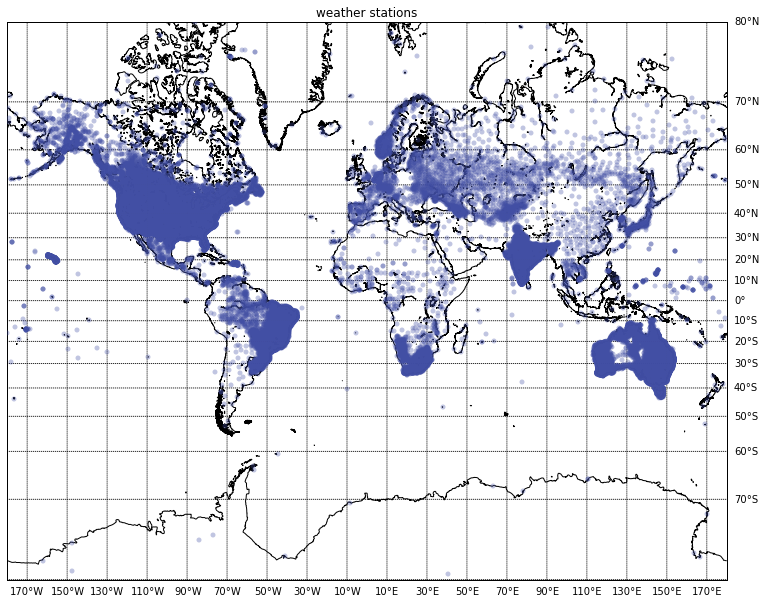

In [9]:
# Create a map where the density of points is represented as a density map (topographical map)

## I have taken two approaches to this question:
## 1. Assuming that density map implies density of stations on the map, 
##    I have plotted all the points using translucent markers. Hence when the stations are denser, the colors are darker.
##    When stations are sparsely distributed, the color is lighter.
## 2. Plotted the elevation as density map. But in this case, I have used different colors to show different values


## This is using approach 1. (Approach 2 in next section)
## 1. Assuming that density map implies density of stations on the map, 
##    I have plotted all the points using translucent markers. Hence when the stations are denser, the colors are darker.
##    When stations are sparsely distributed, the color is lighter.

from mpl_toolkits.basemap import Basemap
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap
%matplotlib inline

plt.figure(figsize=(15,10),dpi=300)
m = Basemap(projection='merc',llcrnrlat=latsmin,urcrnrlat=latsmax,\
            llcrnrlon=lonmin,urcrnrlon=lonmax,lat_ts=20,resolution='i')
m.drawcoastlines()

# draw parallels and meridians.
parallels = np.arange(-80,81,10.)
m.drawparallels(parallels,labels=[False,True,True,False])
meridians = np.arange(10.,351.,20.)
m.drawmeridians(meridians,labels=[True,False,False,True])

x,y = m(lons, lats)

m.plot(x, y, 'o', markersize=5,zorder=6, markerfacecolor='#424FA4',markeredgecolor="none", alpha=0.33)

plt.title('weather stations')

plt.show()

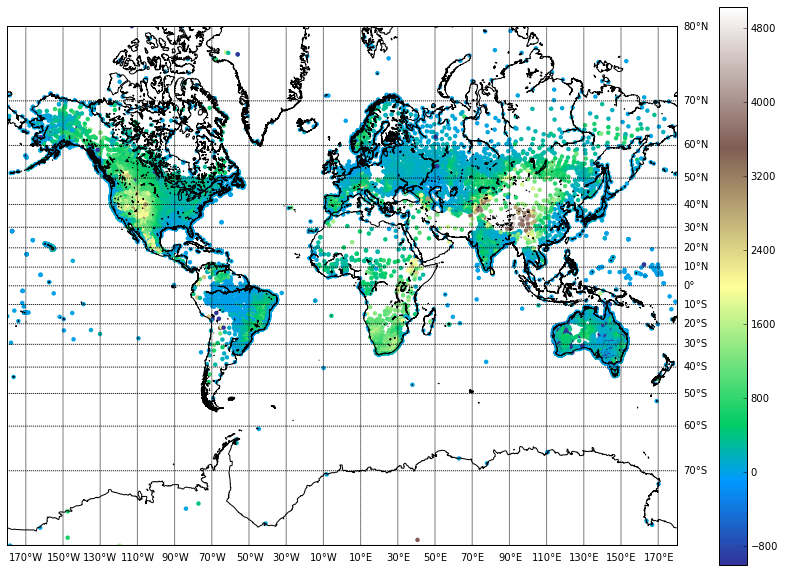

In [10]:
## This is using approach 2.
## 2. Plotted the elevation as density map. But in this case, I have used different colors to show different values


from mpl_toolkits.basemap import Basemap
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap
%matplotlib inline

lons=stations.ix[:,'longitude'].values
lats=stations.ix[:,'latitude'].values
elev=stations.ix[:,'elevation'].values

plt.figure(figsize=(15,10),dpi=300)
m = Basemap(projection='merc',llcrnrlat=latsmin,urcrnrlat=latsmax,\
            llcrnrlon=lonmin,urcrnrlon=lonmax,lat_ts=20,resolution='i')
m.drawcoastlines()

# draw parallels and meridians.
parallels = np.arange(-80,81,10.)
m.drawparallels(parallels,labels=[False,True,True,False])
meridians = np.arange(10.,351.,20.)
m.drawmeridians(meridians,labels=[True,False,False,True])

xpt,ypt = m(lons, lats)

plt.scatter(xpt,ypt,c=elev,s=20,edgecolor = '',cmap='terrain')

plt.colorbar()

plt.show()


In [11]:
# Create a map that would represent, using color, the values of a chosen column (Mean, Std, V0,V1 etc.). 
# Draw conclusions from the map


## Get relevant data from weather notebook
weather_to_plot = pd.read_csv('weather_to_plot.csv')

weather_to_plot = weather_to_plot[['station','latitude','longitude','Mean','Std','V0','V1','V2']]


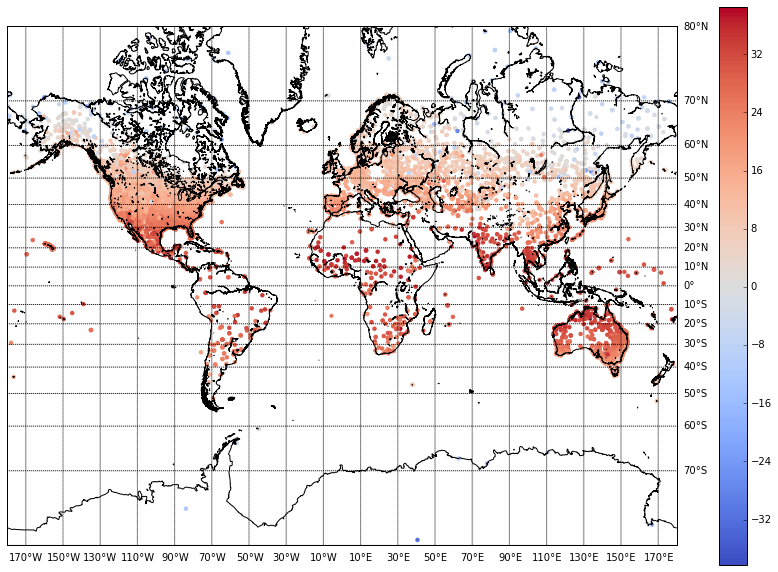

In [13]:
## Here I have created a function that can accept any value Mean, Std, V0, V1 or V2 and plot the corresponding value
## on the map

from mpl_toolkits.basemap import Basemap
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap
%matplotlib inline

lons=weather_to_plot.ix[:,'longitude'].values
lats=weather_to_plot.ix[:,'latitude'].values

def plot_req_field(pf):
    plot_field=weather_to_plot.ix[:,pf].values
    plt.figure(figsize=(15,10),dpi=300)
    m = Basemap(projection='merc',llcrnrlat=latsmin,urcrnrlat=latsmax,\
                llcrnrlon=lonmin,urcrnrlon=lonmax,lat_ts=20,resolution='i')
    m.drawcoastlines()
    # draw parallels and meridians.
    parallels = np.arange(-80,81,10.)
    m.drawparallels(parallels,labels=[False,True,True,False])
    meridians = np.arange(10.,351.,20.)
    m.drawmeridians(meridians,labels=[True,False,False,True])
    xpt,ypt = m(lons, lats)
    plt.scatter(xpt,ypt,c=plot_field,s=20,edgecolor = '',cmap='coolwarm')
    plt.colorbar()
    plt.show()

    
# Input any of the following to plot in the map ('Mean','Std','V0','V1','V2')    
plot_req_field('Mean')

## The map below displays only 'Mean' at this point. Other variables can be plotted by re-running the function

# What conclusions can you draw from this map? (I have also provided the explanation in the markdown)

## Mean graph clearly shows that the geographical locations closer to the equator have higher mean temperatures 
## But as you go towars either poles, the mean temperatures start declining

## Standard deviation graph shows that the temperature deviation is lesser closer to the equators 
## but increases as you go towards poles

## V0, V1 and V2 capture interesting patterns in the data which can be used to understand the principal categoies of 
## temperature patterns pictorially